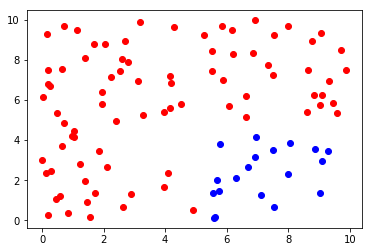

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_datas = 100
np.random.seed(1)

data = []
x_data = []
y_data = []
for i in range(num_datas):

    x1 = np.random.uniform(0.0,10.0)
    x2 = np.random.uniform(0.0,10.0)

    if x1 > 5.0 and x2 < 5.0:
        y = 1
        # 눈이 온다 - 파란색 점
        plt.plot(x1, x2, 'bo')
    else:
        y = 0
        # 눈이 안온다 - 빨간색 점
        plt.plot(x1, x2, 'ro')
    data.append([x1,x2,y])
    x_data.append([x1, x2])
    y_data.append([y])
plt.show()

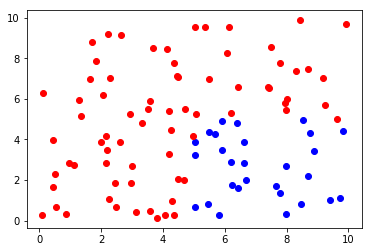

In [16]:
testdata = []
np.random.seed(2)
x_tdata = []
y_tdata = []
for i in range(num_datas):

    x3 = np.random.uniform(0.0,10.0)
    x4 = np.random.uniform(0.0,10.0)

    if x3 > 5.0 and x4 < 5.0:
        yy = 1
        # 눈이 온다 - 파란색 점
        plt.plot(x3, x4, 'bo')
    else:
        yy = 0
        # 눈이 안온다 - 빨간색 점
        plt.plot(x3, x4, 'ro')
    testdata.append([x3,x4,yy])
    x_tdata.append([x3, x4])
    y_tdata.append([yy])
plt.show()

In [19]:
X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

H = 1 / (1 + tf.math.exp(-(tf.matmul(X,W)+b)))

cost = -tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

predicted = tf.cast(H > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict = {X : x_data, Y : y_data})
    if step % 200 == 0:
        print(step, cost_val)
            
h, c, a = sess.run([H, predicted, accuracy], feed_dict = {X : x_data, Y : y_data})
print("\n H : ", h, "\n Correct : ", c , "\n Accuracy : ", a)

0 1.3143588
200 0.27305242
400 0.22839737
600 0.21085086
800 0.20057362
1000 0.1934106
1200 0.18791458
1400 0.18344009
1600 0.17965236
1800 0.17635861
2000 0.17343903
2200 0.1708145
2400 0.16843006
2600 0.16624609
2800 0.16423294
3000 0.16236776
3200 0.16063249
3400 0.15901259
3600 0.15749599
3800 0.15607266
4000 0.15473402
4200 0.15347277
4400 0.15228242
4600 0.15115738
4800 0.15009262
5000 0.14908375
5200 0.14812675
5400 0.14721797
5600 0.14635417
5800 0.14553243
6000 0.14474992
6200 0.14400427
6400 0.1432931
6600 0.14261432
6800 0.14196604
7000 0.14134644
7200 0.14075382
7400 0.14018671
7600 0.13964358
7800 0.13912319
8000 0.13862424
8200 0.1381456
8400 0.13768616
8600 0.13724495
8800 0.136821
9000 0.13641346
9200 0.13602145
9400 0.13564424
9600 0.13528107
9800 0.13493128
10000 0.13459422

 H :  [[1.4315336e-04]
 [1.2260041e-03]
 [1.4606832e-01]
 [4.6070744e-03]
 [2.0730451e-03]
 [2.5649287e-04]
 [1.1563086e-06]
 [4.6559453e-06]
 [1.8866486e-03]
 [2.8715057e-02]
 [1.7543935e-04]
 [7

In [20]:
h2, c2, a2 = sess.run([H, predicted, accuracy], feed_dict = {X : x_tdata, Y : y_tdata})
print("\n H : ", h2, "\n Correct : ", c2 , "\n Accuracy : ", a2)


 H :  [[9.18826580e-01]
 [5.36515824e-02]
 [6.93523139e-02]
 [7.18578012e-05]
 [5.25647588e-02]
 [2.68090330e-02]
 [1.81424155e-04]
 [4.08729420e-06]
 [3.74513686e-01]
 [9.97570336e-01]
 [9.27512467e-01]
 [7.71254599e-01]
 [4.44544166e-05]
 [2.42299601e-01]
 [6.21385314e-03]
 [4.91863966e-01]
 [6.60863668e-02]
 [7.04934746e-02]
 [7.34999776e-02]
 [1.23879172e-05]
 [6.44038141e-01]
 [9.09355104e-01]
 [7.19760060e-02]
 [7.23119665e-05]
 [1.25123470e-05]
 [9.37212348e-01]
 [1.03166130e-05]
 [8.89358699e-01]
 [4.31389421e-01]
 [1.36793207e-03]
 [5.67743741e-02]
 [9.75995600e-01]
 [8.53485893e-04]
 [7.77598321e-01]
 [8.49374354e-01]
 [1.70460492e-01]
 [5.28020179e-03]
 [9.77904443e-03]
 [8.82591546e-01]
 [9.21257436e-01]
 [9.82391059e-01]
 [2.91359216e-01]
 [4.25235629e-02]
 [1.03972305e-03]
 [9.98950183e-01]
 [6.99271977e-01]
 [1.25127686e-02]
 [2.01856811e-03]
 [4.25226847e-03]
 [7.56401903e-07]
 [9.87978697e-01]
 [1.20117068e-02]
 [1.30563527e-01]
 [7.25774044e-07]
 [2.70900398e-01]
 [1